<a href="https://colab.research.google.com/github/christophergaughan/Bioinformatics-Code/blob/main/02_TensorFlow_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PLEASE NOTE**: I am following along with a bootcamp I took by **Mr. Daniel Bourke.** Here is his excellent website: https://www.mrdbourke.com/learn-tensorflow-for-deep-learning/. I go above what he does, including explanations and describing things for the absolute beginner with python. If that's you, Read on. Even if you're a little rusty, this notebook will help you get your game on with TensorFlow.


# What is a classification Problem?

The short answer is "How can I put something into a bin/bins based on characteristics a neural network can detect".

 1. **Binary classification** (2 classes) e.g. Spam/Not Spam
 2. **Multiclass classification** (more than 2 classes) e.g. Is this a picture of steak? Sushi? Pizza?
 3. **Multilabel Classification** Which tags should this publication have (Machine Learning, Representation Learning Artificial Intelligence?) *e.g. If you are Wikipedia, you want to sort your articles because you have millions of them and you want to put them into different categories. Labelling it with one category may not be enough and you want to be able to relate it to other things- But **here** confusion arises when you are looking at the difference between `Multiclass classification` and `Multilabel classification`*

 > The main difference between `Multiclass classification` and `Multilabel classification` is that in `Multilabel classification` **there are multiple labels options per sample** while in
 `Multiclass classification` **there is only one label per sample** - one photo and one label will be sushi, one photo and one label will be steak and so on...


 ### We are going to cover the following in this notebook:
 * Architecture of a neural netwrork **classification** model
 * Input shapes and output shapes of a **classification** model (features and labels)
 * Creating a custom data to view and fit
 * Steps in modelling
 * Creating a model, compiling a model, fitting a model, evaluating a model
 * saving and loading models


**Classification inputs and outputs**
say we are building an app wherein you can take a picture of some food and it will tell you what food you are about to eat (bear with me).
* Our inputs are the pictures
* Our ideal output will be that specific food label

Our process will look something like:

> `inputs [input shape A]--> image converted to tensor--> Machine learning algorithm (black box) --> Ideal Outputs (again a tensor reflecting the probability that identifies the input ([output shape A])`

**Before we can pass our inputs into the machine learning algorithm we have to ask ourselves "What does our ML algorithm like to look at?"

Can it understand photo's straighaway?? Obviously not. We have to pass it carefully calibrated photos of *specific lengths and heights* to numerically encode our images. In other words we will know the width and the height as well as the **color channels**. These color channels will be some combination of red, green and blue. The width and the height are somewhat arbitrary but they will be *consistent* throughout your model. To be more specific, we are going to turn these images into a TENSOR. The good news is that the machine learning algorithm is something that already exists (BUT we *can* build our own custom one)  

Our ML Algorithm will learn patterns in the data and will make a prediction output.



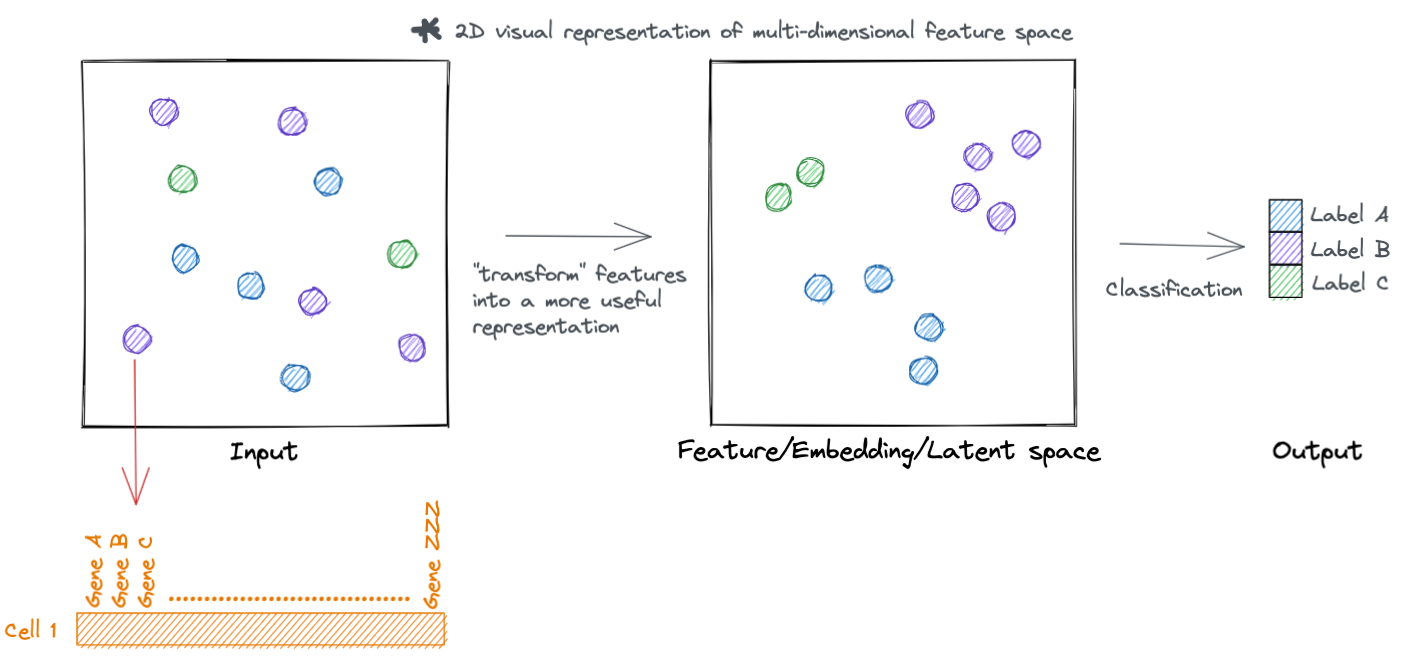

Image obtained from: Deep learning explainer: a simple single cell classification model, Erik Storrs, https://storrs.io/sc-deep-learning-explainer/

# Typical Architecture of a neural network classification model
*Note: I'll just make a pandas table so you can see this easier*

In [1]:
# Importing the pandas library. This is a cool library help you display rich outputs in IPython environments, which include Jupyter Notebooks and Google Colab
# If you need to make a table for a presentation, these are good libraries to use
import pandas as pd
from IPython.core.display import display, HTML

# Creating the data
data = {
    'Hyperparameter': ['Input layer shape', 'Hidden layer(s)', 'Neurons per hidden layer', 'Output layer shape', 'Hidden activation', 'Output activation', 'Loss function', 'Optimizer'],
    'Binary Classification': ['Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)', 'Problem specific, minimum = 1, maximum = unlimited', 'Problem specific, generally 10 to 100', '1 (one class or the other)', 'Usually ReLU (rectified linear unit)', 'Sigmoid', 'Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)', 'SGD (stochastic gradient descent), Adam'],
    'Multiclass Classification': ['Same as binary classification', 'Same as binary classification', 'Same as binary classification', '1 per class (e.g. 3 for food, person or dog photo)', 'Same as binary classification', 'Softmax', 'Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)', 'Same as binary classification']
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Convert the DataFrame to HTML and use CSS to add text wrapping
df_html = df.to_html(index=False).replace('<table', '<table style="white-space: normal; width: 100%;"')

# Adding the citation at the bottom
citation = "<p style='text-align: right; margin-top: 10px;'>Adapted from page 295 of <i>Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow</i> Book by Aurélien Géron</p>"

# Display the HTML table and the citation
display(HTML(df_html + citation))


Hyperparameter,Binary Classification,Multiclass Classification
Input layer shape,"Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)",Same as binary classification
Hidden layer(s),"Problem specific, minimum = 1, maximum = unlimited",Same as binary classification
Neurons per hidden layer,"Problem specific, generally 10 to 100",Same as binary classification
Output layer shape,1 (one class or the other),"1 per class (e.g. 3 for food, person or dog photo)"
Hidden activation,Usually ReLU (rectified linear unit),Same as binary classification
Output activation,Sigmoid,Softmax
Loss function,Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow),Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)
Optimizer,"SGD (stochastic gradient descent), Adam",Same as binary classification


📖
# Recommended Reading: A Recipe for Training Neural Networks
*I highly recommend reading A Recipe for Training Neural Networks by Andrej Karpathy.*

## Why You Should Read This:
**Expert Insights:** Andrej Karpathy is a well-respected expert in the field of machine learning and AI, currently serving as the Director of AI at Tesla.

**Practical Tips:** This article provides valuable practical guidelines and considerations for training neural networks, which can save you a lot of time and effort in your own projects.

**Troubleshooting Help:** The article gives useful advice for diagnosing and fixing issues that commonly arise during the training process. This can be invaluable for both beginners and experienced practitioners.

**Clear Explanations:** The article is written in an easy-to-understand manner, making complex topics accessible to a broad audience.

**Foundational Knowledge:** Understanding the concepts in this article can provide a strong foundation for further learning and application in machine learning and neural networks.

*Reading this article will offer you a well-rounded understanding of the key factors that go into effectively training neural networks. It's a resource you'll likely find yourself returning to as you gain more experience in the field.*

In [2]:
# Begin coding Neural Networks with tensorFlow

# Creating data to view and fit
from sklearn.datasets import make_circles

# Create circles from scikit-learn
X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)



In [3]:
# Check out the features, which are 2-D circles
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
 # Check the labels
 y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

**What kind of classification are we going to work with??**
* Is it Binary?
* Is it multilabel?
* Is it Multiclass?

Well, it's not multilabel because each feature has just one label. It's not multiclass, because each label is either 1 or 0
✅ It is Binary classification because we see that there are just two labels; 1 and 0. However, if you look at the X features- you ,ight get a bit confused. Thus, lets visualize our data

In [5]:
import pandas as pd
circles = pd.DataFrame({"x": X[:,0], "y": X[:,1], "label": y})
circles.head()


,x,y,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### Now the data makes a little more sense given that we have 2-D circles
*Remember to always visualize your data as tables and plots because we are dealing with machine learning algorithms which can often be confusing to us humans*

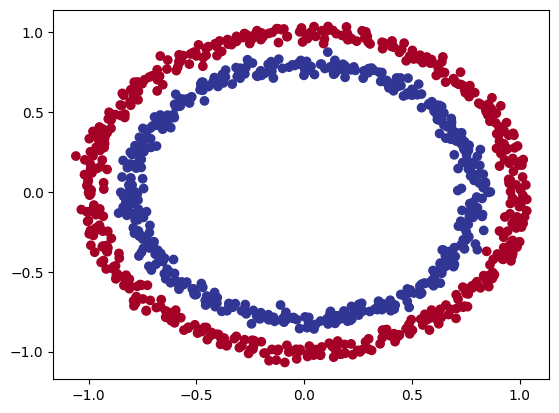

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()


### How are we going to model this??

Lets build a model that can detect red circles from blue circles (0 or 1)
Also: remember how we looked at data concerning *Regression*? How is this different? Think about this please. Use https://shorturl.at/ixHN9 to further your knowledge of how neural networks work. *click the link as it is very cool*

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
# Check how many samples we're working with
len(X), len(y)


(1000, 1000)

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
X[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

## Steps in Modeling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps (then subsequent optimization) to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).
4. **Evaluate the model**
5. **tweak the model**
6. **Evaluate** *etc. etc*

It's not so different from running an experiment in the lab

**If you want to know which tensorflow version you are working with, just run the first 2 lines of code**

In [12]:
import tensorflow as tf
print(tf.__version__) # Question, what's up eith the double lines around (__version__)?

import datetime
import pytz

# Set timezone to New York
ny_timezone = pytz.timezone('America/New_York')

# Get current time in New York timezone
ny_time = datetime.datetime.now(ny_timezone)

print(f"Notebook last run (end-to-end): {ny_time}")


2.15.0
Notebook last run (end-to-end): 2024-03-25 20:01:53.191164-04:00


In [13]:
# Set the random seed so we can all get the same numbers
tf.random.set_seed(42)



# 1. Start with the simplest model posible using the sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model: in classification models we will use "accuracy" as the metric
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


**Note** because we set set our metric for accuracy, we see that our model is only around 50%. That sucks. This is a *binary classification problem- basically heads or tails*. **OUR MODEL IS BASICALLY GUESSING**

### How might we improve our model??

Let's try and train it for a longer time (i.e. use more epochs)

In [14]:
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(tf.expand_dims(X, axis=-1), y)



32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

**Nope** training for longer did not do a thing, however, we *are* engaging in the type of experimentation that *would* help our model fit

In [15]:
# Let's try to add a layer and reduce the number of epochs with 100 less as compared to the above

# Set the random seed
tf.random.set_seed(42)

# 1  Create a model, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

# 4. evaluate the model
model_2.evaluate(tf.expand_dims(X, axis=-1), y)



32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000


[0.693893313407898, 0.5]

##### Wow, the model still sucks, being only 50% accurate

In [16]:
circles["label"].value_counts()


1    500
0    500
Name: label, dtype: int64

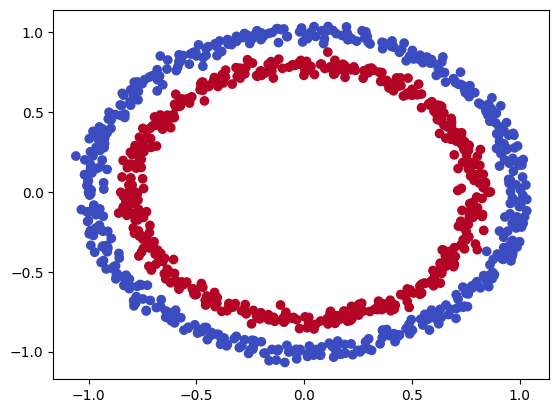

In [17]:
 # Visualize with a plot
 import matplotlib.pyplot as plt
 plt.scatter(X[:,0], X[:,1] , c=y, cmap="coolwarm")
 plt.show()


## A note about slicing in Python and how it's used in the code above

## Explaining the Scatter Plot Code

Consider the following line of code:

```
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm")
```

### Components Explained

- **`plt.scatter()`:** This function creates a scatter plot and is a part of the Matplotlib library, commonly imported as `import matplotlib.pyplot as plt`.

- **`X[:,0]`:** This slice notation takes all rows (`:`) and only the first column (`0`) of `X`, effectively extracting the first feature of every data point.

- **`X[:,1]`:** Similarly, this slice notation takes all rows (`:`) and only the second column (`1`) of `X`, extracting the second feature of every data point.

- **`c=y`:** This argument sets the color of each point in the scatter plot. The variable `y` typically contains the labels or some other form of group identification for the data points.

- **`cmap="coolwarm"`:** This sets the colormap to "coolwarm," which will map low values to a cool color (blue) and high values to a warm color (red).

### In-depth Explanation

1. **Array Slicing**: The slicing notation `[:,0]` and `[:,1]` are ways to extract specific columns from a 2D array. The colon `:` signifies "take all rows," and the number specifies which column to take. `[:,0]` takes all rows from the first column, and `[:,1]` takes all rows from the second column. This is a powerful feature of NumPy, facilitating efficient data manipulation.

2. **Scatter Plotting**: The `plt.scatter()` function plots points on a graph. The first and second arguments specify the X and Y coordinates of these points. Here, the first feature of every data point is the X-coordinate, and the second feature is the Y-coordinate.

3. **Color Mapping**: The `c=y` and `cmap="coolwarm"` arguments color the points based on their labels or some metric. In a binary classification, points labeled 0 and 1 could be colored blue and red, respectively.

By understanding this line of code, one can see that a scatter plot is being created where each point represents a data point in `X`. The first and second features of each data point serve as the X and Y coordinates, respectively, and the color represents the label or some other metric in `y`.
'''


## Improving a Model

To enhance the performance of our model, we can make modifications at each of the three main steps involved in building and training a neural network.

### 1. Creating a Model
In this phase, you may consider:
- **Adding more layers**: Increasing the network's depth can potentially improve its ability to learn from the data.
- **Increasing the number of hidden units**: More neurons in each layer might improve the model's learning capability.
- **Changing the activation functions**: Using different activation functions in the layers can also make a difference.

### 2. Compiling a Model
Consider the following options at this stage:
- **Optimization function**: Switching to a different optimizer like Adam could improve training efficiency.
- **Learning rate**: Fine-tuning the learning rate can impact how quickly or effectively the model learns.

### 3. Fitting a Model
During this step, you could:
- **Increase the number of epochs**: Allowing the model to train for a longer time may result in better learning, but be cautious of overfitting.

![image.png](https://camo.githubusercontent.com/8a6f2fb40aa18ccc247b10b13c8e8eaf91ae0f9960f839ce3a4e61b876571d57/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30322d696d70726f76696e672d612d6d6f64656c2d66726f6d2d6d6f64656c2d70657273706563746976652e706e67)

** Figure can be found at: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb

*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

Note: The following message (below this one) can be ignored if you're running TensorFlow 2.8.0+, the error seems to have been fixed.

Note: If you're using TensorFlow 2.7.0+ (but not 2.8.0+) the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:

Example Colab Notebook
TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes

In [ ]:
# Improving our model- What can we try?

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

# evaluate the model
model_3.evaluate(tf.expand_dims(X, axis=-1), y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939824223518372, 0.5]

## DAMN, *still*  no improvement

In [ ]:
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2, 100)            200       
                                                                 
 dense_4 (Dense)             (None, 2, 10)             1010      
                                                                 
 dense_5 (Dense)             (None, 2, 1)              11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 ### Improving our not so good model

 So it bears repeating, we've basically got a situation where we have 500 heads and 500 tails, and the model is not doing any better than we could at merely guessing. This is not why we make these neural nets.

 So *How* will we improve the model?

 * add more layers
 * could choose a different optimization function
 * fit our model for more epochs

# Table describing the components of our hyperparameters

These are "knobs" we can turn to improve our models outputs

In [ ]:
# Required libraries
import pandas as pd
from IPython.display import display

# Adjusting pandas display settings
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Display all columns in one line
pd.set_option('display.max_colwidth', -1)  # Display full content of each cell

# Create the table as a pandas DataFrame
data = {
    'Component': ['Loss Function', 'Optimizer Choice', 'Metrics', 'Epochs', 'ReLU Activation', 'Softmax Activation'],
    'Function': [
        'Measures how well the model’s predictions match the true labels. Used to guide the model to adjust its weights.',
        'Defines how the model updates its weights based on the output of the loss function. Common choices include SGD, Adam.',
        'Used to monitor the model’s performance during training and testing. Common metrics for classification include accuracy.',
        'Defines the number of times the learning algorithm will work through the entire training dataset. Adjusting this can affect the model’s performance.',
        'A type of activation function that transforms each input to the maximum of that input and zero. It adds non-linearity to the model, allowing it to learn complex patterns.',
        'Used in the output layer of a classification model. It converts the model’s raw output scores into probabilities for each class, ensuring they sum to 1.'
    ]
}

df = pd.DataFrame(data)

# Display the table
display(df)


<ipython-input-20-5d7fa580d104>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # Display full content of each cell


,Component,Function
0,Loss Function,Measures how well the model’s predictions match the true labels. Used to guide the model to adjust its weights.
1,Optimizer Choice,"Defines how the model updates its weights based on the output of the loss function. Common choices include SGD, Adam."
2,Metrics,Used to monitor the model’s performance during training and testing. Common metrics for classification include accuracy.
3,Epochs,Defines the number of times the learning algorithm will work through the entire training dataset. Adjusting this can affect the model’s performance.
4,ReLU Activation,"A type of activation function that transforms each input to the maximum of that input and zero. It adds non-linearity to the model, allowing it to learn complex patterns."
5,Softmax Activation,"Used in the output layer of a classification model. It converts the model’s raw output scores into probabilities for each class, ensuring they sum to 1."


**Let's increase the number of neurons and add an extra layer to see how this works**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

# evaluate the model
model_3.evaluate(tf.expand_dims(X, axis=-1), y)




32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5058


[0.6944112777709961, 0.5057500004768372]

**Damn, no better**

In [ ]:
 # What' the model actually predicting?
model_3.predict(X)

32/32 [==============================] - 1s 5ms/step


array([[[0.50063396],
        [0.51424086]],

       [[0.53994757],
        [0.51627684]],

       [[0.54148936],
        [0.5157557 ]],

       ...,

       [[0.5238293 ],
        [0.54134935]],

       [[0.5028174 ],
        [0.54024285]],

       [[0.51295036],
        [0.49517894]]], dtype=float32)

#### We're trying to see 0's and 1's not these 0.5's etc
To visualize our model prediction, let's create a function called `plot_decision_boundary()`. This function will:

* Take in a trained model, features(X) and labels (y)
* Create a mesh-grid of the different X_values
* make predictions based on the mesh-grid
* Plot the predictions as well as a line between zones (where each unique class falls)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# This is a complex function, make sure to check the sources below to fully understand it


def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap='coolwarm', alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='coolwarm')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


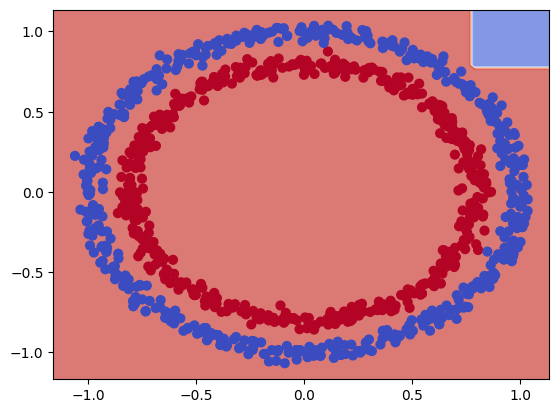

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)


# Let's explain some key workings of the function above, including key features of the code


## Explanation in Markdown format
markdown_text = '''
## Explaining the Code Syntax

### Initial Comments and Imports:

```
import numpy as np
import matplotlib.pyplot as plt
# This is a complex function, make sure to check the sources below to fully understand it

```

- The comment at the beginning provides context, indicating the function is complex and users should refer to the source for a deeper understanding.

- **numpy** (imported as `np`) is a foundational package in Python for numerical operations and working with arrays.

- **matplotlib.pyplot** (imported as `plt`) is a module in the `matplotlib` library used for plotting visualizations.

### Function Definition:

```
def plot_decision_boundary(model, X, y):
```

- This starts the definition of a function named `plot_decision_boundary` with three parameters: the `model`, data `X`, and labels `y`.

### Inside the Function:

- There's a multi-line string providing documentation about the function, where it was adapted from, and links to the original resources.

### Axis Boundaries:

```
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
```

- Here, axis boundaries for the plot are being determined.
  - `X[:, 0].min()` extracts the smallest value in the first column of `X` (and similarly for max).

  - The `- 0.1` and `+ 0.1` are offsets to ensure the plot covers all data points.

### Creating a Meshgrid:

```
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
```

- A meshgrid is created for the entire plotting area. `np.meshgrid` returns coordinate matrices.

### Predictions:

```
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = model.predict(x_in)
```

- `xx.ravel()` and `yy.ravel()` flatten the 2D arrays.
  - `np.c_[]` concatenates them to create a 2D input array, which the model uses to make predictions.

### Multi-class Check:

- The following section checks if the model is performing binary or multi-class classification, and reshapes the prediction accordingly for plotting.

### Plotting the Decision Boundary:

```
plt.contourf(xx, yy, y_pred, cmap='coolwarm', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
```

- `plt.contourf` plots the decision boundary.
  - `plt.scatter` then overlays the original data points.
  - The last two lines set the x and y axis limits for the plot.

### Importance of Understanding Syntax:

Grasping this syntax is essential as it allows:

1. Modification or expansion of the code as needed.
2. Clear comprehension of the flow and operations being executed.
3. Easier troubleshooting when issues arise.
4. Skill transfer from one context to another.





## Importance of Attributing Code

When we're learning to code or building projects, it's common to seek help from various sources, whether that's online communities, books, or tutorials. However, it's crucial to always attribute or give credit to the original creators of the content we utilize. Here's why:

### 1. **Respect for Original Creators**:
By attributing code, you show respect for the individuals or teams who put in the time, effort, and creativity to produce that resource. It's an acknowledgment of their contribution to the broader tech community.

### 2. **Integrity and Honesty**:
Attributing sources shows you have integrity. It demonstrates that you're honest about your work, and it's clear about which parts were your effort and which parts were built on the work of others.

### 3. **Learning and Growth**:
It's okay to not know everything. When you're transparent about where you got a piece of code from, it highlights areas you can further learn and grow in. It also indicates that you're proactive in seeking solutions.

### 4. **Builds Trust**:
When others see you giving credit where credit is due, it builds trust. They know they can rely on you to be truthful about your contributions and expertise.

### 5. **Community Building**:
Acknowledgment encourages creators to keep sharing. By attributing, you play a part in fostering a community where individuals are motivated to share, teach, and help each other.

### In Conclusion:
Always remember, there's no shame in using someone else's code to help solve your problems or enhance your projects, but always give credit. It's a practice that benefits everyone involved, from the original creators to the broader tech community.

**"Standing on the shoulders of giants"** is a concept wherein using the understanding and insights of those who came before us can lead to further advances. But always remember to acknowledge those giants!


In [ ]:
# Let's see if our model is can be used for a regression problem

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# split our regression data into training and test data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:

# Set the random seed
tf.random.set_seed(42)

 # 1. Create the model
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1)    # output layer

 ])

 # 2. Compile the model, this time with regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])

 #  3. fit the model_3 to the regression data
model_3.fit(tf.expand_dims(X_reg_train, -1), y_reg_train, epochs=100)




Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 227.6174 - mae: 227.6174
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 86.6632 - mae: 86.6632
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 89.2356 - mae: 89.2356
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 55.6387 - mae: 55.6387
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 45.1784 - mae: 45.1784
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 50.0443 - mae: 50.0443
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 43.6420 - mae: 43.6420
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.0301 - mae: 42.0301
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 42.4052 - mae: 42.4052
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 42.3713 - mae: 42.3713
Epoch 11/100
5/5 [==============================] - 0s 5m

2/2 [==============================] - 0s 7ms/step


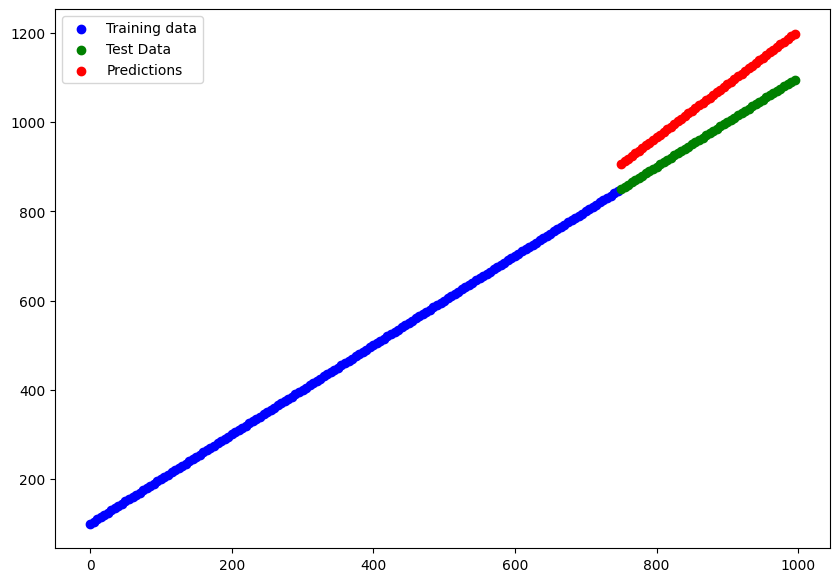

In [ ]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(tf.expand_dims(X_reg_test, -1))

# Plot the predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="green", label="Test Data")
plt.scatter(X_reg_test, y_reg_pred, c="red", label="Predictions")
plt.legend();

### OK, the predictions aren't perfect but they are **very much better than guessing**

<u>However</u>, we are missing *a critical peformance piece: <b>non-linearity</b>*

## The Missing Piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with an ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

### Why is Non-linearity So Important in Neural Networks?

1. **Expressiveness and Complexity**: Without non-linearity, no matter how many layers our neural network has, it can only model linear relationships. By introducing non-linear activation functions, we enable our neural network to model more complex and intricate patterns in the data.

2. **Hierarchy of Features**: Non-linear activation functions allow neural networks to build a hierarchy of features. The first layers might recognize simple patterns, and as you go deeper into the network, the combinations of these simple patterns become more complex.

3. **Mimicking Natural Processes**: Many natural processes and phenomena are non-linear. If we're trying to model such processes, a non-linear approach is a must.

4. **Flexibility**: Non-linear activation functions introduce a bend in the decision boundary, allowing for more flexible model architectures.

5. **Essential for Deep Learning**: Deep Learning models, which involve multiple interconnected layers, fundamentally rely on non-linearity. Without it, the depth of the model would be pointless, as all layers would be performing the same linear transformation on the input data.

🔨 **Practice**: Before we get to the next steps, I'd encourage you to play around with the TensorFlow Playground (check out what the data has in common with our own classification data) for 10-minutes. In particular, the tab which says "activation". Once you're done, come back.

Did you try out the activation options? If so, what did you find?

If you didn't, don't worry, let's see it in code.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/).



# Modeling Biological Systems with Neural Networks

Biological systems are incredibly intricate and complex. When we attempt to model or mimic these systems computationally, we encounter two fundamental characteristics:

1. **Non-linearity**: Most biological processes and systems aren't linear. This means they don't follow a straightforward or direct relationship between input and output. For instance, the relationship between a drug's dosage and its effectiveness or side effects is not always a straight line. Another example can be the rate of enzyme activity based on substrate concentration in biochemistry, which often follows a sigmoidal (S-shaped) curve. If you have any doubts about or interest in this, just take a Biochemistry class and that will bring you up to speed.

2. **Redundancy**: Redundancy is a fundamental feature of biological systems. It ensures that if one mechanism or pathway fails or is inefficient, others can compensate for its functions. This redundancy is a survival mechanism that provides resilience and robustness to biological entities. For instance, in human genetics, if one gene fails to produce a necessary protein, often another gene (or genes) can partially or wholly compensate for this loss. Just think about an airplane, they have built-in features that offer *many* layers of redundancy in case one piece of the control systems should fail.

Neural networks, especially deep learning models, can capture both these aspects:

- **Introducing Non-linearity**: In neural networks, non-linearity is introduced primarily through the use of activation functions. Activation functions, such as the sigmoid, hyperbolic tangent (`tanh`), and Rectified Linear Unit (ReLU), allow the network to model and capture non-linear relationships. Without these non-linear activations, no matter how deep the network, it would essentially behave like a linear model. For modeling biological processes, this non-linearity becomes crucial because it lets the model learn and generalize from complex *patterns* in the data. In essence, neural networks are picking up such patterns.

- **Modeling Redundancy**: Neural networks have the capability to model redundancy, especially through their architecture. Layers with numerous neurons can potentially learn various representations of the input data, with different neurons recognizing different patterns. This is analogous to the redundancy we see in biological systems. The network can make accurate predictions even if some neurons or even entire layers are dropped, which is the idea behind techniques like dropout regularization. This provides resilience to the model, just like redundancy in biological systems offers resilience to organisms. **Note**: this type of modeling for redundancy is still an ongoing field of study and there needs to be more knowledge on the computational side of this problem. Below, we get an outside, expert opinion on the problem of modeling redundancy outside of the *black box* API we use in these notebooks. It deserves a deep-dive outside of this simple treatment of the problem.

In summary, to mimic or model biological systems using neural networks, it's essential to incorporate both non-linearity and redundancy. This allows our computational models to get closer to the behaviors and characteristics we observe in nature.

All this said, actually trying to replicate biological systems in *any* computational environment will always fall short of your expectations. We just don't have enough data yet to really have the understanding of the complexity these systems. You must calibrate your expectations and be patient with your modeling


# Redundancy in Systems: A Conversation with Julius Cisek - *an Engineer at Google*

Julius Cisek, an engineer at Google, (and my excellent friend) shares his insights on the role of redundancy in systems, particularly at Google, and its implications.

## Redundant Services, Not Redundant Coding

In his work, Julius highlights that they don't focus on "redundant coding" but instead on "redundant services." The core idea is to always have multiple instance of something running, ensuring that service requests can be redirected if one fails.

> "You always have at least two of something running, and there's a load balancer that can ensure that all service requests go to any running an instance of the service. Most of the time, the benefits are around the same code but on different hardware."

Such a system checks the health of services, and if one is found unhealthy, requests are redirected.

## High Availability

Julius dives deep into the concept of high availability, a significant aspect of his work.

> "That kind of thing is called high availability, and it's something that I do a ton of in my work."

However, when it comes to redundant coding, where the code itself has some special attributes, he's less familiar with that.

## Breaking Down Functionality

One key strategy Julius shares is the division of functionality into independent blocks of code that can be run as services.

> "Mostly, my work is about splitting functionality into blocks of code that can be run as a service. Each piece of code is independent and doesn't have any state."

This ensures that every piece of data required should be provided as part of the request.

## It's Complex and Varied

Discussing the intricacies of his work, Julius states:

> "This is a vast topic, and it's my area of expertise. The thing is, there's no single solution."

He goes on to elaborate on the various factors at play, such as the type of data, the nature of the problem (synchronous vs. asynchronous), and computation time.

## The Need for Immediate Responses

In some systems, immediate answers are paramount.

> "And then there's things where you need an answer right away no matter what."

Julius also touches upon the challenges faced, especially when dealing with AI, citing the computing power required to run large language models.

## A Practical Example

Julius offers a practical example to elucidate his points:

> "Think about analyzing a DNA molecule... you split up the complete molecule into like a thousand pieces... then you put each of those pieces into a queue... then you have ten processors... it'll do ten at a time... then it'll store the results somewhere... then it'll put them back together when the whole thing is done."

This example showcases the importance and utility of breaking tasks into manageable, independent chunks, thereby optimizing the processing and ensuring redundancy.


# Drawing Parallels: Julius Cisek's Insights & Biological Systems

The conversation with Julius Cisek, an engineer at Google, is an enlightening glimpse into the world of software system redundancy and its design principles. Drawing parallels between his work and biological systems, we can make several intriguing observations and realize the broader applicability of these principles in the real world.

## 1. Redundancy is a Natural Defense

### Biological Systems:
In biological systems, redundancy plays a crucial role in ensuring survival. For instance, the human body has two kidneys, two lungs, and other redundant systems. If one organ fails, the other can still perform necessary functions. This built-in redundancy acts as a buffer against unexpected failures, ensuring the continued functioning of the organism.

### Julius' Work:
Similarly, Julius emphasizes redundant services to safeguard against unforeseen hardware or software failures. Having multiple instances running ensures that if one goes down, others can seamlessly take over, ensuring uninterrupted service.

## 2. Modular and Independent Functioning

### Biological Systems:
Cells, the building blocks of life, operate as individual units that can function and even reproduce independently in the right conditions. Each cell contains all the information (DNA) needed to produce a replica of itself.

### Julius' Work:
He mentions splitting functionality into independent blocks of code, reminiscent of how cells operate. Each block of code can function independently, ensuring that the failure of one doesn't bring the whole system down.

## 3. Adaptability and Scalability

### Biological Systems:
Biological systems exhibit remarkable adaptability. For example, muscles grow stronger with use and shrink when not exercised. Similarly, neural connections in the brain strengthen with use and weaken otherwise.

### Julius' Work:
Julius touches on the importance of scalability based on request volume. Services need to adapt and scale according to the demand, just as biological systems adapt to the demands placed on them.

## 4. Guarantee of Execution

### Biological Systems:
Processes like the heartbeat, breathing, and digestion continue without conscious thought. There's an implicit guarantee that these processes will continue to execute to keep the organism alive.

### Julius' Work:
In the context of email, Julius highlights that once a message is sent, there should be a guarantee of its delivery, regardless of the time it might take. This mirrors biological guarantees where processes continue to ensure survival.

## Real-World Applicability

Julius' insights shed light on the real-world importance of designing systems that are resilient, adaptable, and scalable:

1. **Business Continuity:** In a world driven by online services, ensuring high availability and uninterrupted service can mean the difference between business success and failure.
  
2. **Efficiency & Cost Management:** Efficiently scaling services means resources are used optimally, translating to cost savings.
  
3. **User Experience:** By guaranteeing execution and providing timely responses, user trust and satisfaction are maintained.

In essence, the principles Julius discusses, though technical in nature, have broader implications, emphasizing the importance of robust system design in our increasingly digital world.



In [ ]:
# OK, let's deploy our model with non-linearity added with an Activation Function

# set random seed
tf.random.set_seed(42)

# 1. create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear"),
])

 # 2. complile the model
model_4.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# 3. fit the model
history = model_4.fit(tf.expand_dims(X, -1), y,
                      epochs=100)

# 4. evaluate the model
model_4.evaluate(tf.expand_dims(X, -1), y)


Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2179 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1730 - accuracy: 0.4986
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1044 - accuracy: 0.4983
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0780 - accuracy: 0.4992
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0491 - accuracy: 0.4987
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9747 - accuracy: 0.5005
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9077 - accuracy: 0.4985
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7767 - accuracy: 0.5002
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6971 - accuracy: 0.4979
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5888 - accuracy: 0.4992
Epoch 11/

[0.6931471228599548, 0.5012812614440918]

**Not as good as we want**

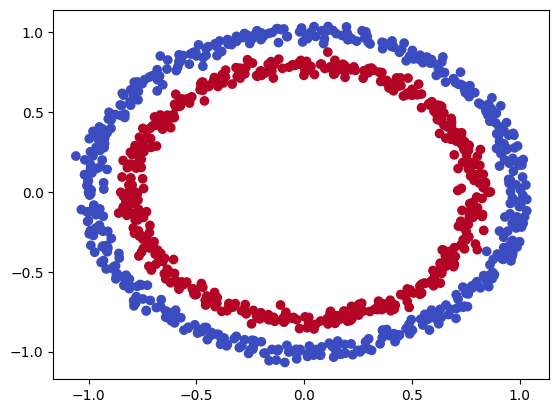

In [ ]:
# Check our data
plt.scatter(X[:,0], X[:,1] , c=y, cmap="coolwarm")
plt.show()

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


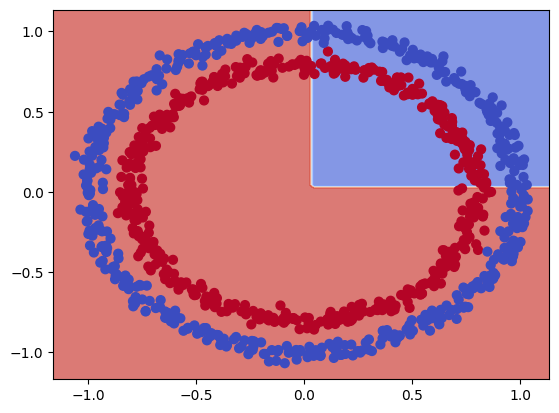

In [ ]:
# Check our decision boundary
plot_decision_boundary(model_4, X, y)
plt.show()



Lets try to build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create model with a non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
])

 # 2. complile the model
model_5.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# 3. fit the model
history = model_5.fit(tf.expand_dims(X, -1), y,
                      epochs=100)

# 4. evaluate the model
model_5.evaluate(tf.expand_dims(X, -1), y)



Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4633 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1579 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7945 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8866 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4513 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3574 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3098 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2703 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2369 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2065 - accuracy: 0.5000
Epoch 11/

[0.6967846751213074, 0.5]

**Our model is still not learning**
Let do this:
* add more layers
* add more neurons
* keep the rest the same (i.e. keep using the non-linear function)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(tf.expand_dims(X, -1), y, epochs=100)

# Evaluate the model
model_6.evaluate(tf.expand_dims(X, -1), y)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.9570 - accuracy: 0.4969
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5112 - accuracy: 0.4995
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2783 - accuracy: 0.4982
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1442 - accuracy: 0.4999
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9745 - accuracy: 0.4987
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8985 - accuracy: 0.4978
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8558 - accuracy: 0.4986
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.4987
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8269 - accuracy: 0.4969
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.5002
Epoch 11/

[0.6957967877388, 0.49690625071525574]

Nope: model is just guessing

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer: No activation function
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.1551 - accuracy: 0.4470
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9749 - accuracy: 0.4570
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9122 - accuracy: 0.4580
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8745 - accuracy: 0.4410
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.3990
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8277 - accuracy: 0.3810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.3790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.3890
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7857 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7746 - accuracy: 0.3690
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.2813 - accuracy: 0.9240


[0.28125670552253723, 0.9240000247955322]

**Better, but not yet**

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


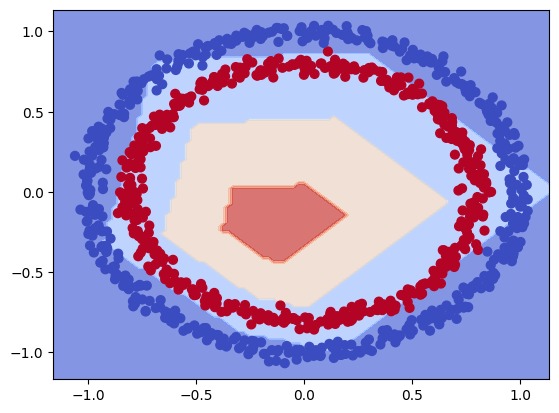

In [ ]:
plot_decision_boundary(model_6, X, y)

It seems like our model is the same as the one in the TensorFlow Playground but model it's still drawing straight lines...

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all.

One more model (I promise... actually, I'm going to have to break that promise... we'll be building plenty more models).

This time we'll change the activation function on our **output layer** too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [ ]:
# Evaluate our model
model_7.evaluate(X, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7900


[0.4773046672344208, 0.7900000214576721]

### Wow!!!!! Spot on- almost perfect accuracy! Placing a `sigmoid` activation function on the output layer is what seems to have pushed us into the realm where we can obtain accurate results. But in reality, it is all the things we did to place into our model the non-linearity.

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


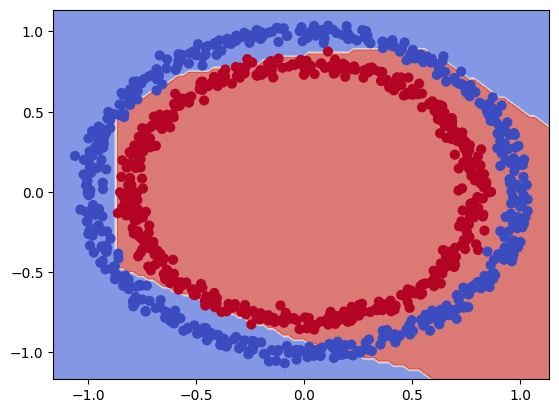

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

Now our model is consistently getting almost perfect results!!!! We are getting the picture we want from our function where the blue and the red dots, with some inaccuracy, are splitting the guesses into the proper red and blue boundaries.

It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 Question: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

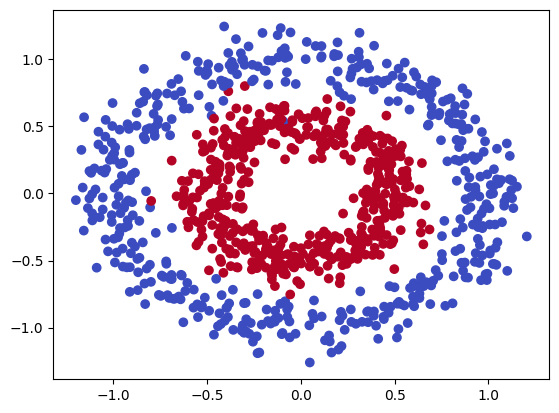

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate dataset
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.show()


In [ ]:
import tensorflow as tf

# Define the model
model_X = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=2, activation='relu'),  # Hidden layer with 10 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_X.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Train the model
history = model_X.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)


In [ ]:
# Evaluate the model's performance
loss, accuracy = model_X.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


7/7 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9950
Test Loss: 0.1435
Test Accuracy: 99.50%


In [ ]:
# Evaluate the model's performance
loss, accuracy = model_X.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


7/7 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9950
Test Loss: 0.1435
Test Accuracy: 99.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


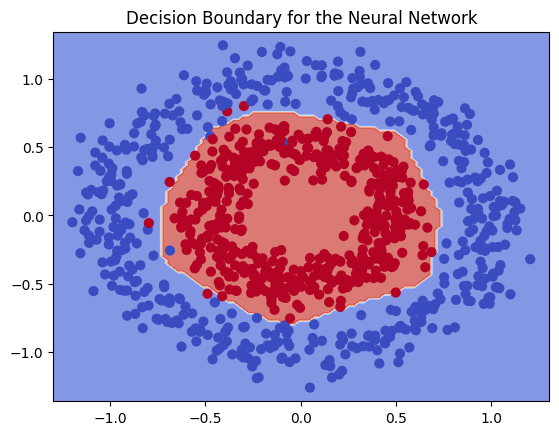

In [ ]:
plot_decision_boundary(model_X, X, y)
plt.title("Decision Boundary for the Neural Network")
plt.show()


### See- here we used a model with *<u>One Less</u>* layer and we got the same basic answer. Just a thought..but notice we also did something else!! Look at the code.

# Toy Model

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
tf.random.set_seed(42)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

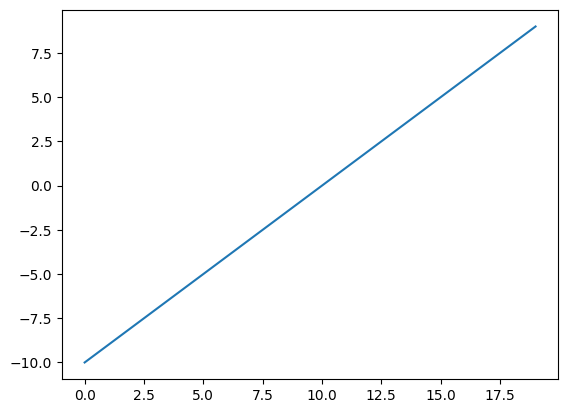

In [ ]:
# Visualize our toy tensor
plt.plot(A);

A straight (linear) line!

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

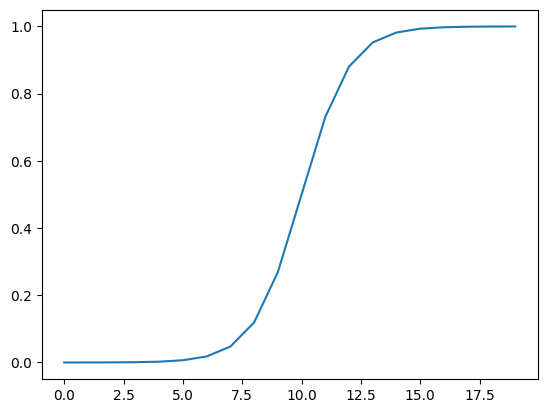

In [ ]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A))

A non-straight (non-linear) line!


Okay, how about the ReLU function (ReLU turns all negatives to 0 and positive numbers stay the same)?

### A bit of math on the sigmoid function

# Sigmoid Activation Function

The sigmoid function, often used as an activation function in neural networks, especially for **binary classification problems**, is mathematically described by the equation:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $\sigma(z)$ is the output of the sigmoid function given an input $z$.
- $e$ is the base of natural logarithms.

## Graphical Representation

When you plot the sigmoid function, you'll notice it produces an "S" shaped curve. This curve maps any input value into a range between 0 and 1. This makes it particularly useful when we're interested in producing a probability-like output from our network.

## Properties of the Sigmoid Function

1. **Output Range**: The function is bound between 0 and 1. This is particularly useful when we interpret the output as a probability.
2. **Non-linearity**: Even though it might seem like the function is linear, it's not. This non-linearity is crucial for learning and making classifications.
3. **Gradient**: The sigmoid function has a gradient (or derivative) which is used during backpropagation when training the network:

$$
\sigma'(z) = \sigma(z) (1 - \sigma(z))
$$

Where $\sigma'(z)$ represents the derivative of $\sigma(z)$.

However, a notable limitation is that for very high or very low values of $z$, the gradient is very close to zero. This phenomenon can lead to a **vanishing gradient problem** making the updates to the weights almost negligible, hence, slowing down the training process. <u>*This has been one of the reasons for the introduction and popularity of other activation functions like ReLU*</u>.





# The Sigmoid curve in Biochemistry and medicine

## Enzyme Kinetics: Michaelis-Menten Equation

Enzymes play a critical role in biological reactions by catalyzing and accelerating reaction rates. The Michaelis-Menten equation is fundamental in enzyme kinetics as it describes how the reaction velocity \( V \) of an enzyme-catalyzed reaction changes concerning substrate concentration \([S]\).

The equation is given by:

$$
V = \frac{V_{max} \times [S]}{K_m + [S]}
$$

Where:
- $V$ is the reaction velocity.
-  $V_{max}$ is the maximum reaction velocity when the enzyme is fully saturated with substrate.
-  $K_m$ is the Michaelis constant, which is the substrate concentration at which the reaction velocity is half of $V_{max}$. It provides an idea of the enzyme's affinity for the substrate; a low $K_m $ indicates high affinity.

## Characteristics:

1. **Saturation**: At high substrate concentrations $[S] \rightarrow \infty $, the reaction velocity approaches $V_{max}$.

2. **Half-maximum velocity**: When $[S] = K_m$, the velocity is:

 $$V = \frac{V_{max}}{2}$$


## Hemoglobin-Oxygen Binding

Hemoglobin, found in red blood cells, is a protein responsible for transporting oxygen from the lungs to the body's tissues. Hemoglobin can carry up to four molecules of oxygen. Its binding with oxygen is cooperative, meaning the binding of one oxygen molecule affects the binding of the next.

The oxygen-binding curve of hemoglobin is sigmoidal (or S-shaped). This shape ensures:
1. Efficient oxygen pick-up in the lungs.
2. Effective oxygen release in the tissues.

### Characteristics:

1. **T-state (Tense state)**: This is a lower affinity state of hemoglobin for oxygen. It's more prevalent in areas with low oxygen concentration, promoting oxygen offloading to tissues.
2. **R-state (Relaxed state)**: A higher affinity state for oxygen. Predominant in areas with high oxygen concentration, like the lungs, promoting oxygen uptake.

The transition between T and R states is what gives hemoglobin its sigmoidal oxygen-binding curve. External factors, like pH and carbon dioxide concentration, can also influence this curve. For example, in the presence of higher carbon dioxide levels or lower pH (Bohr effect), hemoglobin has a decreased affinity for oxygen, promoting oxygen release in actively metabolizing tissues.


In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

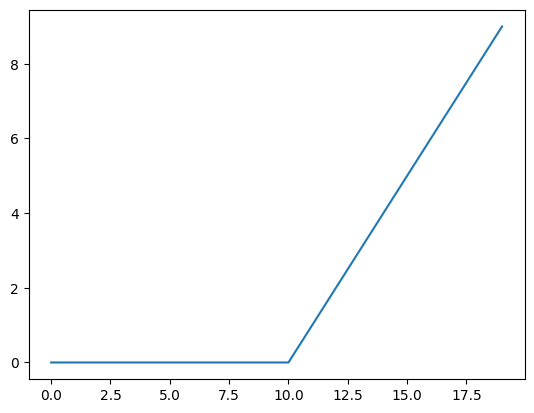

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

## The ReLu function: In a neural network, the activation function is responsible for transforming the summed weighted input from thre node into the activation of the node or output for that particular input.

In ther case of our toy problem, if a number is negative, it get's turned into a zero, if the number > 0, the number stays at that number.

## ReLU (Rectified Linear Activation) in TensorFlow

The **ReLU** function is a popular activation function used in neural networks and deep learning models. In TensorFlow, as in many other deep learning frameworks, ReLU introduces non-linearity to the model. Without non-linear activation functions, no matter how many layers you add to a neural network, it would behave just like a linear model, thus limiting its capacity to represent complex patterns.

Mathematically, the ReLU function is given by:

$$
f(x) = max(0, x)
$$
If $x$ is negative, the function outputs 0. If $x$ is positive, the function outputs $x$.



### Key Functions of ReLU:

1. **Introducing Non-linearity**: This is the primary purpose. Non-linearity allows the network to approximate more complex, non-linear relationships in the data.
2. **Computational Efficiency**: The ReLU function is computationally efficient because it only requires a simple thresholding at zero. This allows models to train faster and requires less computational resources compared to more complex functions like the sigmoid or tanh.
3. **Sparsity**: ReLU activation can lead to sparsity. When the output is zero, it's essentially ignoring that particular input, leading to a sparse representation. Sparsity is beneficial because it makes the network easier to optimize and can lead to a more efficient model.

**Issues with use**

However, there are issues associated with ReLU, such as the **"dying ReLU"** problem. Neurons can sometimes get stuck during training and always output zero. Variants like Leaky ReLU, Parametric ReLU, and Exponential Linear Unit (ELU) have been proposed to counteract this problem.

In TensorFlow, you can use the ReLU activation function like this:

```
import tensorflow as tf
```

```
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    # ... other layers ...
])
```

Well, how about TensorFlow's `linear activation function`? Hint- it does not alter the numbers

In [ ]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

 It looks like our inputs are unmodified...

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Whereas, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the following: ml-cheetsheet.readthedocs.io. https://colab.research.google.com/drive/1ASIGSTW29UWm46LXyP1oJpKWTTd5t6D3#scrollTo=gvzDuqPGGilZ&line=5&uniqifier=1

## Evaluating and improving our classification model
If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets **(Remeber model_X above?)**.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set. In other words, let's split our data into training and test sets (i.e.- look at model_X above)!

Let's do it.

In [ ]:
# How many features do we have?
len(X)

1000

In [ ]:
# One good thing aabout our dataset is that it is essentially made up of random numbers
X, y

(array([[-0.14592449, -0.33452808],
        [ 1.10055606, -0.57705638],
        [ 0.82449928, -0.42958177],
        ...,
        [-0.4203985 , -0.36566079],
        [ 0.84981681, -0.41209255],
        [ 0.26759009, -0.34757944]]),
 array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 

In [ ]:
# Split data into train and test sets 80/20
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2), (800,), (200,))

Now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [ ]:
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 12        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_X.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                30        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])
# Remember: the optimizer tells our model how to improve; how should it
# update the internal patterns that is has learned

# the loss function basically tells us how wrong those patterns are
# Since we are increasing the loss rate on our learning function
# we are basically saying that we're telling the model how much to improve those patterns
# Since we are improve the weights in the neural netwrork by 10%, we are telling the model to improve finding those
# patterns by 10% (Adam lr is default 0.001)

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7072 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4663
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4625
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4700
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.4988
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5213
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5275
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5275
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5325
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.5375
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.5967 - accuracy: 0.6750
Model loss on the test set: 0.5966850519180298
Model accuracy on the test set: 67.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


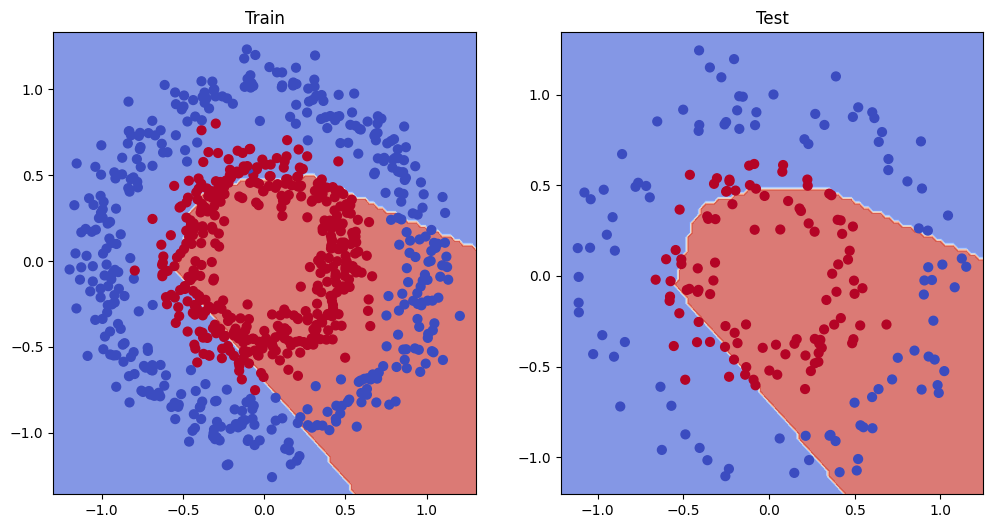

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2) # 1 row, 2columns, 2nd plot
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


### Plot the loss curves *How do we find the ideal `Learning Rate (lr=?)`?

Looking at the plots above, we can see the outputs of our model are not all that great *Remember, every version of your model might improve or degrade each time*

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it. We can google "tensorflow fit function" then look at www.tensorflow.org > tf.keras.Model|TensorFlow > fit look at the 'history' object and look at what it returns

In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.707249,0.48250
1,0.701070,0.46625
2,0.696114,0.46250
3,0.691692,0.47000
4,0.687890,0.49875
5,0.684207,0.52125
6,0.680889,0.52750
7,0.677367,0.52750
8,0.674213,0.53250
9,0.670881,0.53750


Text(0.5, 1.0, 'Model_8 training curves')

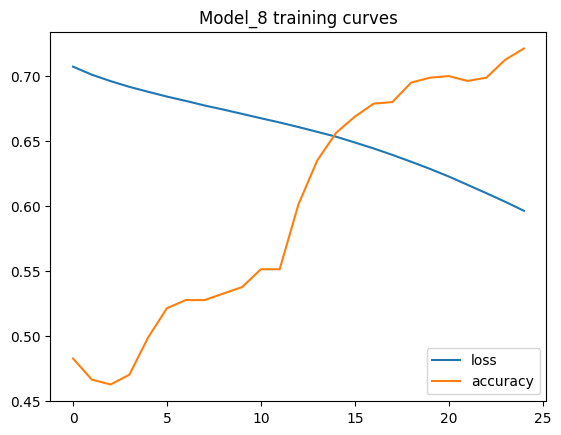

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")


### Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the *most* important hyperparameter you can tune for your neural network models is the **learning rate**.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

<u>*it was a lucky guess*</u>.

In the bootcamp we just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and which ones don't.

This is an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it, and so on.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

* A learning rate **callback**.
    * You can think of a *callback* as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, but we're practicing building models here).
* A modified loss curves plot.
We'll go through each with code, then explain what's going on.

> 🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to *try the defaults first*, then adjust as needed.

**Note** One can try an experimental approach- using code and a formula givern below* that can find the *optimal* learning rate

Given:
- $lr$ = learning rate
- `epoch` = current epoch number

We can attempt to find the optimal learning rate $lr$ by using the following formula as:
$$lr = 1 \times 10^{-4} \times 10^{\frac{epoch}{20}}$$

**Explanation**:

1. The base learning rate is $1 \times 10^{-4}$, which is $0.0001$. This is the learning rate at epoch 0.
  
2. For each epoch, the learning rate is multiplied by a factor of $10^{\frac{epoch}{20}}$. This means that every 20 epochs, the learning rate will increase by an order of magnitude.
   
3. This type of schedule can be useful, for instance, when you're trying to find an optimal learning rate for your model. By starting with a very small rate and gradually increasing it, you can observe the model's performance and pick a learning rate that achieves a good balance between fast convergence and stability.

For instance, using this schedule:
- At epoch 0: $lr = 1 \times 10^{-4} \times 10^{0/20} = 1 \times 10^{-4}$
- At epoch 10: $lr = 1 \times 10^{-4} \times 10^{10/20} = 3 \times 10{-4}$


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7646 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7629 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7611 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7591 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7570 - accuracy: 0.4900 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7548 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.4800 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.4750 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

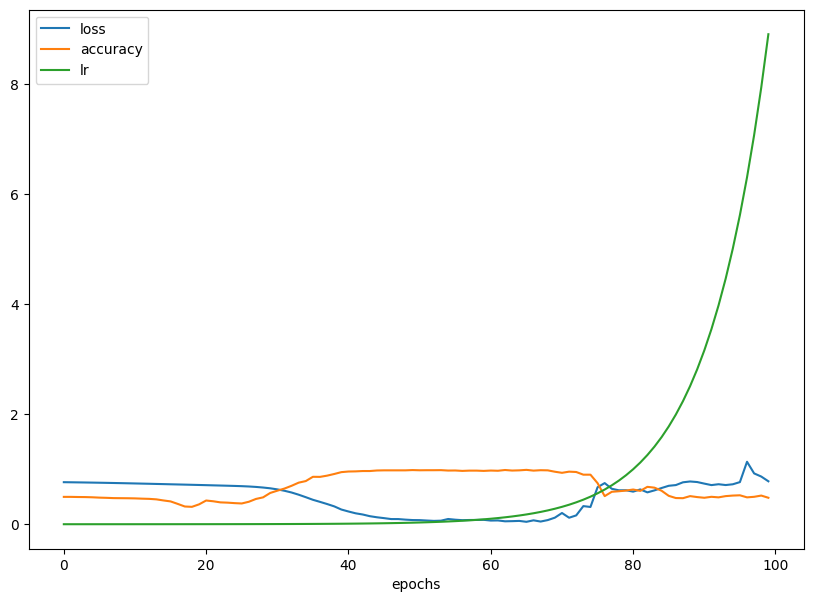

In [ ]:
 # Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases. Think $\frac{d\psi}{d\text{{epochs}}}$
.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

**Note**

The code block provided plots the relationship between the learning rate and the loss, specifically how the loss of a model changes as the learning rate is adjusted.

1. **Creating Learning Rates**:
$\text{lrs} = 1 \times 10^{-4} \times 10^{\frac{\text{np.arange(100)}}{20}}$
Here, the learning rates `lrs` are calculated for 100 points. The learning rate starts from \(1 \times 10^{-4}\) and increases exponentially due to the term &$10^{\frac{\text{np.arange(100)}}{20}}$. The `np.arange(100)` generates numbers from 0 to 99.

2. **Setting up the Plot**:
The plot is created with a size of (10, 7). This specific size was chosen humorously in reference to a Blackjack hand preference of the instructor.

3. **Plotting Data**:
The `plt.semilogx()` function is utilized to create a plot with a logarithmic x-axis. This is useful since the learning rates span several orders of magnitude, and a log scale makes it easier to observe changes across the entire range. The x-axis represents the learning rates (`lrs`), while the y-axis represents the loss values `history.history["loss"]`.

4. **Labels and Title**:
The x-axis is labeled "Learning Rate", the y-axis is labeled "Loss", and the title of the plot is "Learning rate vs. loss".

This plot aids in identifying an optimal learning rate where the loss is the lowest before it starts to increase again, which can be beneficial when training neural networks.


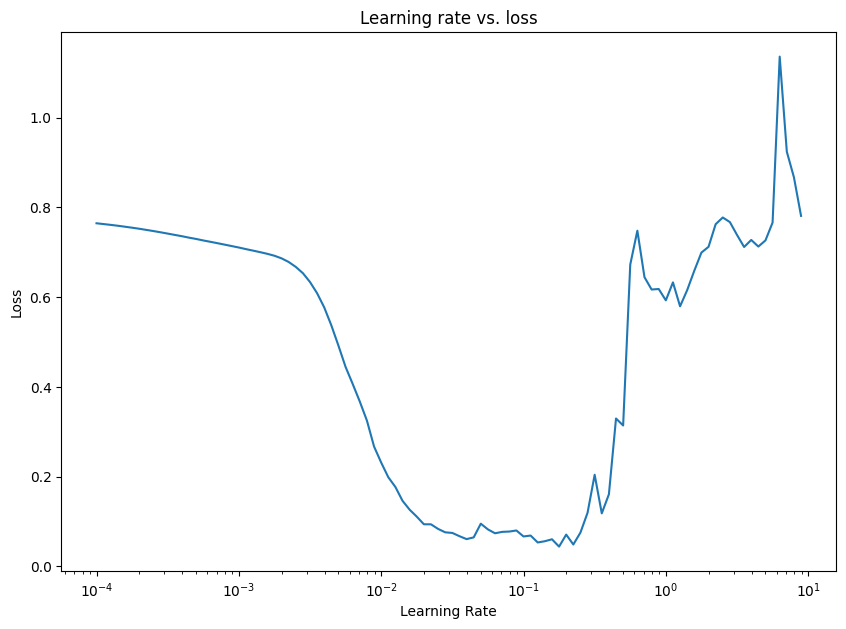

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7)) # The instructor loves a hand of 10 & 7 in Black Jack, we all have our interests
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");


**The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).**i.e. we want to find the area where the loss decreases *the fastest* **BUT** has not yet flattened out. This learning rate is the lowest lowest point on the curve, then go back ~ 10x--> this gives you your *range*  of ideal lr's. *HOWEVER* realize that the default lr is usually a good starting point!

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

### we've estimated the ideal learning rate. We'll use 0.08 for this purpose (I tried a few in the range) for our model, let's refit it. Again-lr-->how fast our model updates the patterns (i.e. the weights, etc..)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.08), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.5038
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5088
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5100
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5225
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5425
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.5537
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5663
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.5738
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6025
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6712
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.8350


[0.5745453834533691, 0.8349999785423279]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


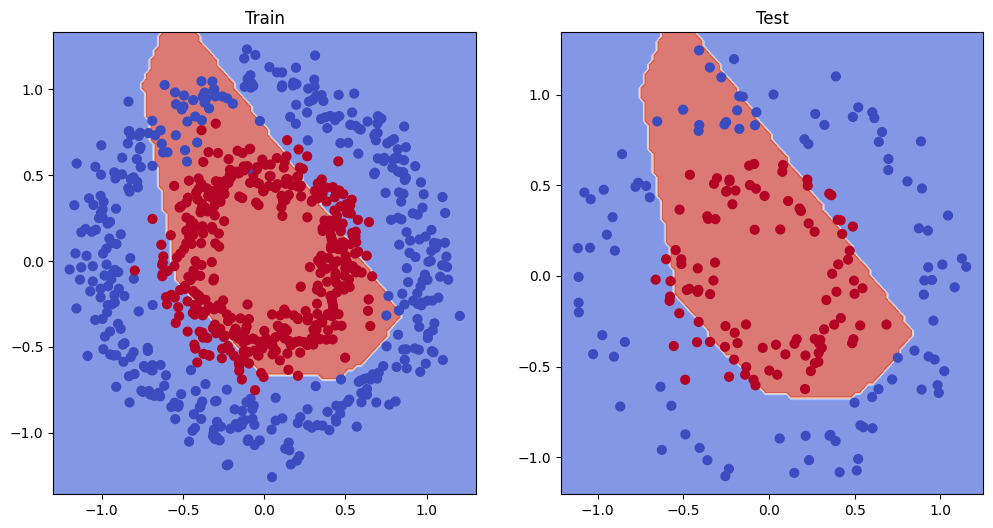

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### We can see that the model is kind of getting the hang of it with the new lr and with an *ok* accuracy **Note:** These numbers will change somewhat everythime we run the notebook. It's not perfect but if you run the tensorflow playground linked abive you will get to see what are the most impotant aspects that underlie this model. Please play with it and come up with your own model.

### Also remember which version of tensorflow we are working on in this here

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


### In this particular notebook we are running tensorflow version 2.13.0, your results may vary with the version of tensorflow you are using, so don't obsess over your values not exactly matching ours. The notebooks are running on Google Colab- and they update as they see fit. Further if you are running the code locally, some differences are to be expected. Google will update this version soon enoughand even though we have set a `random seed`, there is always some noise in the system. This even happens when you run the same notebook again...


In [ ]:
zero to mastery